In [ ]:
!pip install -q google-generativeai

In [ ]:
import google.generativeai as genai

In [ ]:
from google.colab import userdata
genai.configure(api_key=userdata.get('GOOGLE_API_KEY'))

In [ ]:
for i, m in zip(range(5), genai.list_tuned_models()):
  print(m.name)

In [ ]:
base_model = [
    m for m in genai.list_models()
    if "createTunedModel" in m.supported_generation_methods and
    "flash" in m.name][0]

In [ ]:
import random
import re

name = f'Caption Generator-{random.randint(0,10000)}'
# Modify the name to match the regex pattern for id
tuned_model_id = re.sub(r'[^a-z0-9-]', '-', name.lower()).strip('-')
# Ensure it starts with a lowercase letter and replace invalid characters with hyphens

operation = genai.create_tuned_model(
    # You can use a tuned model here too. Set `source_model="tunedModels/..."`
    source_model=base_model.name,
    training_data=[
        {
             'text_input': 'GYM Training',
             'output': 'No pain, no gain. 💪 #FitnessGoals #Workout #Motivation #Strength #Health',
        },{
             'text_input': 'Cake company',
             'output': 'Sweet moments. 🧁 #CakeLove #SweetTreats #Desserts #Baking #Celebration',
        },{
             'text_input': 'Travel agency',
             'output': 'Adventure awaits. 🌍 #TravelGoals #Wanderlust #Explore #Adventure #Vacation',
        },{
             'text_input': 'Fitness trainer',
             'output': 'No pain, no gain. 💪 #FitnessGoals #Workout #Motivation #Strength #Health',
        },{
             'text_input': 'Coffee shop',
             'output': 'Start your day right. ☕ #CoffeeLover #MorningBrew #Cafe #Energy #CozyVibes',
        },{
             'text_input': 'Dog grooming service',
             'output': 'Pawsitively perfect. 🐶 #DogGrooming #PetCare #Dogs #FurryFriends #PamperedPets',
        },{
             'text_input': 'Bookstore',
             'output': 'Escape into a book. 📚 #BookWorm #ReadingTime #Books #Literature #Imagination',
        },{
             'text_input': 'Yoga studio',
             'output': 'Find your balance. 🧘‍♀️ #YogaLife #Mindfulness #Wellness #Balance #Peace',
        },{
             'text_input': 'Jewelry store',
             'output': 'Shine bright. 💎 #JewelryLover #Sparkle #Luxury #Style #Glamour',
        },{
             'text_input': 'Spa and wellness center',
             'output': 'Relax and rejuvenate. 🚰 #SpaDay #Wellness #Relaxation #PamperYourself #Beauty',
        },{
             'text_input': 'Car dealership',
             'output': 'Drive your dream. 🚗 #CarLovers #AutoLife #DreamCar #LuxuryCars #Vehicle',
        },{
             'text_input': 'Photography studio',
             'output': 'Capture the moment. 📸 #PhotographyLife #Memories #PhotoShoot #Creativity #Art',
        },{
             'text_input': 'Music school',
             'output': 'Unleash your talent. 🎶 #MusicLovers #LearnMusic #Talent #Creativity #Passion',
        },{
             'text_input': 'Tech repair shop',
             'output': 'Fix it right. 💻 #TechRepair #GadgetCare #Technology #Solutions #Innovation',
        },{
             'text_input': 'Pet adoption center',
             'output': 'Find a friend for life. 🐕 #PetAdoption #AnimalLovers #RescuePets #ForeverHome #FurryFriend',
        },{
             'text_input': 'Toy store',
             'output': 'Playtime paradise. 🧸 #ToyStore #KidsDream #Fun #Toys #Happiness',
        },{
             'text_input': 'Ice cream parlor',
             'output': 'Chill out with a scoop. 🍦 #IceCreamLove #SweetTreat #Desserts #CoolDown #SummerVibes',
        },{
             'text_input': 'Florist',
             'output': 'Bloom your day. 🌸 #FloristShop #FlowerLove #Nature #Beauty #Fresh',
        },{
             'text_input': 'Home decor shop',
             'output': 'Style your home. 🏡 #HomeDecor #LivingSpaces #InteriorDesign #Style #Comfort',
        },{
             'text_input': 'Art gallery',
             'output': 'Art that inspires. 🎨 #ArtGallery #Creativity #Inspiration #Artists #Masterpiece',
        },{
             'text_input': 'Sportswear shop',
             'output': 'Gear up for greatness. 🏃‍♂️ #Sportswear #ActiveLife #Fitness #Style #Performance',
        }
    ],
    id=tuned_model_id, # Use the modified id
    epoch_count=4,
    batch_size=4,
    learning_rate=0.001,
)


In [ ]:
model = genai.get_tuned_model(f'tunedModels/{tuned_model_id}')

In [ ]:
import time

for status in operation.wait_bar():
  time.sleep(30)

  0%|          | 0/21 [00:00<?, ?it/s]

<Axes: xlabel='epoch', ylabel='mean_loss'>

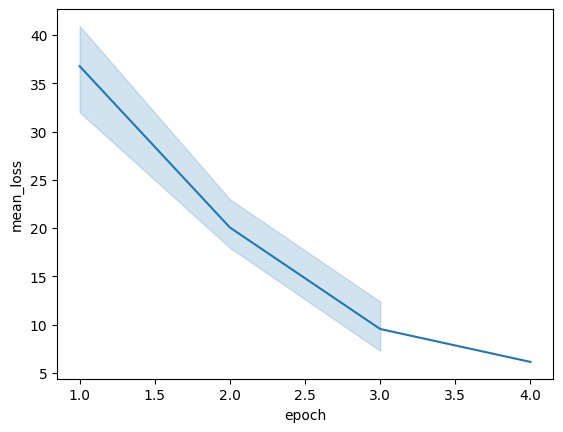

In [ ]:
import pandas as pd
import seaborn as sns

model = operation.result()

snapshots = pd.DataFrame(model.tuning_task.snapshots)

sns.lineplot(data=snapshots, x = 'epoch', y='mean_loss')

In [ ]:
model = genai.GenerativeModel(model_name=f'tunedModels/{tuned_model_id}')

In [ ]:
result = model.generate_content('Sports')
result.text

'Sports ignite passion. #SportsLife #Fitness #Passion #Competition #Goals'

In [ ]:
result = model.generate_content('Yoga')
result.text

'Find your peace. #YogaLife #Mindfulness #Wellness #Peace #Balance'

In [ ]:
result = model.generate_content('Books')
result.text

'Books are portals to new worlds. #Books #Reading #Literature #Escape #Bookshelf'

In [ ]:
result = model.generate_content('Sportswear shop')
result.text

'## Gear up for greatness. #Sportswear #ActiveLife #FitnessGoals #Performance #Style'

In [ ]:
result = model.generate_content('Ice Cream')
result.text

'Cool down with a scoop of paradise. #IceCreamLove #SweetTreat #Desserts #Chill #SummerVibes'

In [ ]:
genai.delete_tuned_model(f'tunedModels/{tuned_model_id}')

In [ ]:
try:
  m = genai.get_tuned_model(f'tunedModels/{tuned_model_id}')
  print(m)
except Exception as e:
  print(f"{type(e)}: {e}")

<class 'google.api_core.exceptions.NotFound'>: 404 GET https://generativelanguage.googleapis.com/v1beta/tunedModels/caption-generator-8814?%24alt=json%3Benum-encoding%3Dint: Tuned model tunedModels/caption-generator-8814 does not exist.


In [ ]:
!pip install langchain google-generativeai seaborn pandas -qU

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.7/412.7 kB 20.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [ ]:
import google.generativeai as genai

# Configure API Key
genai.configure(api_key="TUNED_MODEL_API_1")

In [ ]:
!pip install langchain-community -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 3.5 MB/s eta 0:00:00


In [ ]:
from langchain.llms.base import LLM
from pydantic import BaseModel, Field

# Custom LangChain LLM Wrapper
class GoogleGenAICustomLLM(LLM, BaseModel):
    model_name: str = Field(..., description="Name of the fine-tuned model")

    @property
    def _llm_type(self) -> str:
        return "google_generative_ai"

    def _call(self, prompt: str, stop: list = None) -> str:
        try:
            model = genai.GenerativeModel(model_name=self.model_name)
            response = model.generate_content(prompt)
            return response.text
        except Exception as e:
            return f"Error generating content: {e}"

In [ ]:
# Replace this with your actual fine-tuned model ID
tuned_model_id = "tunedModels/name-generator-c19d8v6ih2oz"

# Load the fine-tuned model
model = genai.GenerativeModel(model_name=tuned_model_id)

In [ ]:
from langchain.prompts import PromptTemplate

# Define the prompt template
prompt = PromptTemplate(
    input_variables=["business"],
    template="Generate a creative caption for {business}:"
)

In [ ]:
from langchain.chains import LLMChain

llm = GoogleGenAICustomLLM(model_name=tuned_model_id)

# Create an LLM chain
chain = LLMChain(llm=llm, prompt=prompt)

<ipython-input-25-4f05958342ac>:6: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  chain = LLMChain(llm=llm, prompt=prompt)


In [ ]:
# Example inputs
businesses = ["Sportswear shop", "Yoga studio", "Ice cream parlor"]

# Generate and print captions
for business in businesses:
    caption = chain.run(business=business)
    print(f"Business: {business}\nCaption: {caption}\n")


<ipython-input-26-feca2fe96778>:6: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  caption = chain.run(business=business)


Business: Sportswear shop
Caption: Error generating content: 400 POST https://generativelanguage.googleapis.com/v1beta/tunedModels/name-generator-c19d8v6ih2oz:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.



Business: Yoga studio
Caption: Error generating content: 400 POST https://generativelanguage.googleapis.com/v1beta/tunedModels/name-generator-c19d8v6ih2oz:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.

Business: Ice cream parlor
Caption: Error generating content: 400 POST https://generativelanguage.googleapis.com/v1beta/tunedModels/name-generator-c19d8v6ih2oz:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.

